# Netflix Movies and TV Shows (kaggle)

##### 출처 : https://www.kaggle.com/ (kaggle)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
df = pd.read_csv("data/netflix/credits.csv", encoding='utf-8') # 영화나 쇼에 나오는 배우나 감독 정보
df2 = pd.read_csv("data/netflix/titles.csv", encoding='utf-8')

In [4]:
df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
df.tail()

,person_id,id,name,character,role
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR
77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR
77212,2050423,tm1098060,Yemi Amodu,NaN,DIRECTOR


In [6]:
df2.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
df.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [8]:
df2.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

### 결측값 다른 값으로 대체하기

In [9]:
df.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

In [10]:
print(df.isnull().sum())
print("\n", df2.isnull().sum())

person_id    0
id           0
name         0
character    0
role         0
dtype: int64

 id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


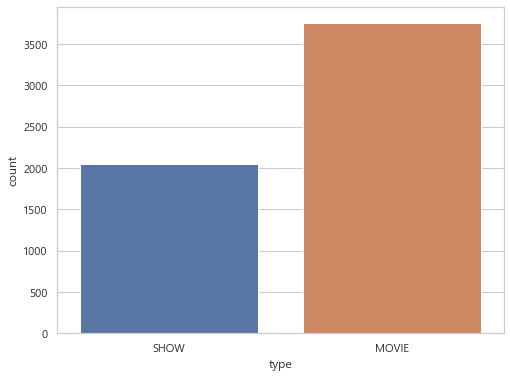

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x="type")
plt.show()

# 전체적으로 영화가 tv 쇼보다 더 많다.

In [12]:
df2.loc[df2["production_countries"].str.contains("KR"), "production_countries"]

380     ['KR']
425     ['KR']
504     ['KR']
535     ['KR']
590     ['KR']
         ...  
5711    ['KR']
5719    ['KR']
5731    ['KR']
5770    ['KR']
5779    ['KR']
Name: production_countries, Length: 216, dtype: object

#### 한국에서 출시한 영화, tv show 분석해보기
- 한국에서 출시한 프로그램은 영화보다 tv show가 더 많았다.

In [90]:
# 한국에서 출시한 영화, show
df2_KR = df2[df2["production_countries"] == "['KR']"]
df2_US = df2[df2["production_countries"] == "['US']"]

# (한국 데이터) credit 합치기
df_KR_m = pd.merge(df2_KR, df, how = 'left', on = 'id')
df_US_m = pd.merge(df2_US, df, how = 'left', on = 'id')
df_KR_m.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime2,person_id,name,character,role
0,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95701.0,Koo Hye-sun,Geum Jan-di,ACTOR
1,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95703.0,Lee Min-ho,Gu Jun-pyo,ACTOR
2,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95702.0,Kim Hyun-joong,Yoon Ji-hoo,ACTOR
3,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,36790.0,Kim Bum,So Yi-jeong,ACTOR
4,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95704.0,Kim Joon,Song Woo-bin,ACTOR


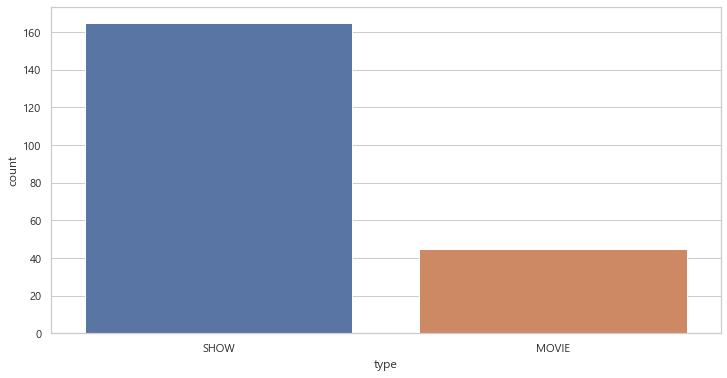

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2_KR, x="type")
plt.show()

# 한국에서 출시한 것 중에 show가 영화보다 많다는 것을 알 수 있다.

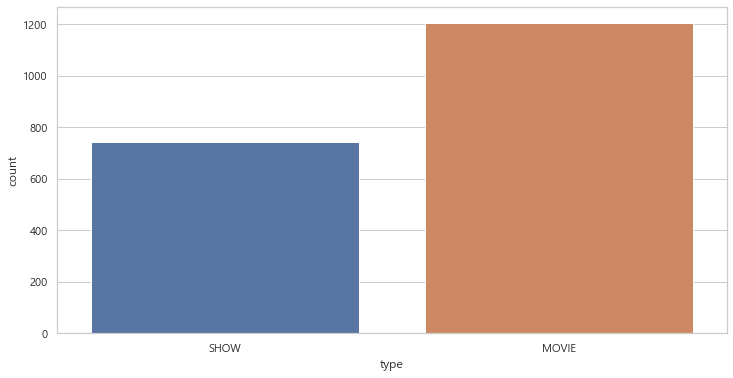

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2_US, x="type")
plt.show()

# 미국에서 출시한 것 중에 영화가 show보다 많다.

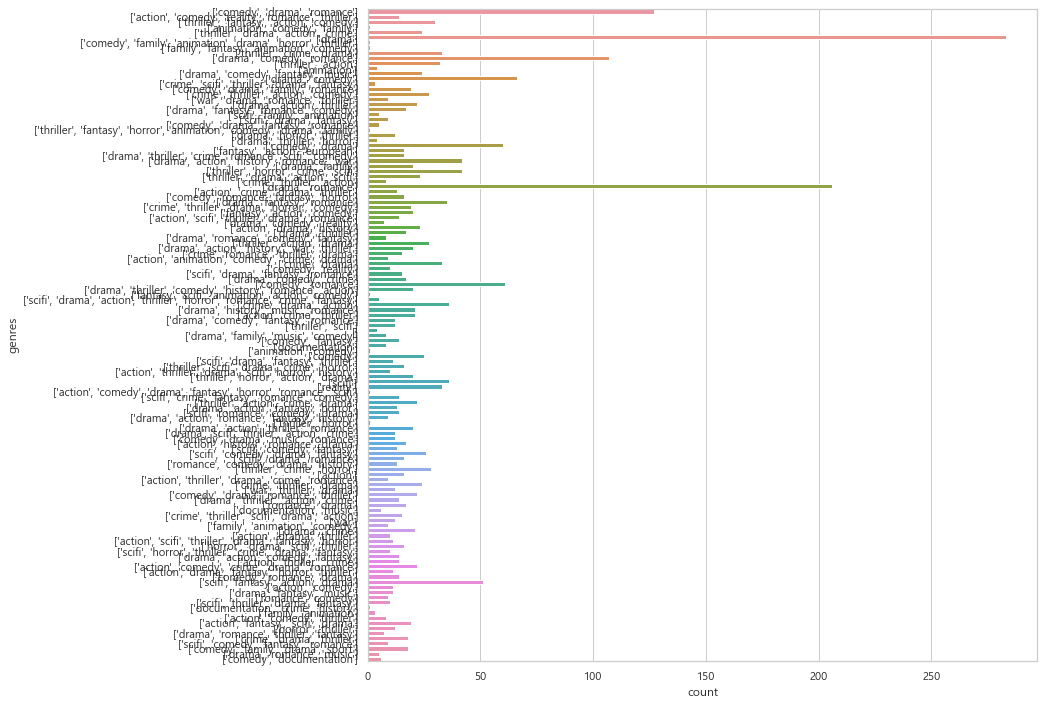

In [22]:
plt.figure(figsize=(12, 12))
sns.countplot(data=df_KR_m, y ="genres")
plt.show()

#### 아래의 그래프와 같이 한국에서 가장 많이 출시된 장르들은 1. drama / 2. drama, romance / 3. comedy, drama, romance로 나타났다.
-> 한국에서는 로맨스 드라마의 종류가 많이 출시되었다

In [80]:
# 드라마도 show에 포함된다.
df_KR_m[df_KR_m['title'] == 'Reply 1988']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
235,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,103374.0,Lee Hye-ri,Sung Deok-sun,ACTOR
236,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,140194.0,Ryu Jun-yeol,Kim Jung-hwan,ACTOR
237,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,38441.0,Park Bo-gum,Choi Taek,ACTOR
238,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,38439.0,Go Kyung-pyo,Sung Sun-woo,ACTOR
239,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,140195.0,Lee Dong-hwi,Ryu Dong-ryong,ACTOR
240,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,101292.0,Ryu Hye-young,Sung Bo-ra,ACTOR
241,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,122899.0,Choi Sung-won,Sung No-eul,ACTOR
242,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,140196.0,Ahn Jae-hong,Kim Jung-bong,ACTOR
243,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,747462.0,Kim Seol,Sung Jin-ju,ACTOR
244,ts37660,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,95,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,tt5182866,9.2,6557.0,15.317,8.7,103760.0,Sung Dong-il,Sung Dong-il,ACTOR


<AxesSubplot:xlabel='count', ylabel='genres'>

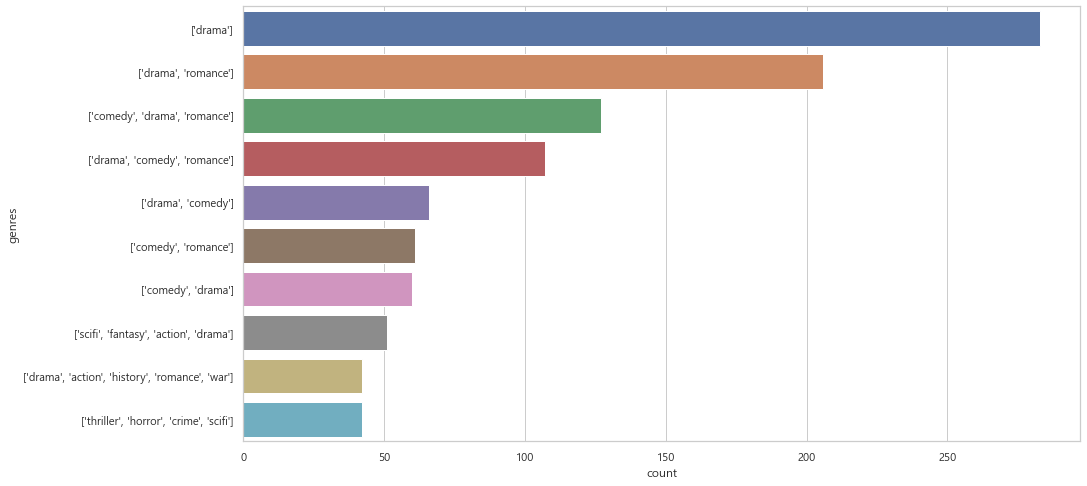

In [70]:
# 장르 상위 10개만 출력하기
df_genres_count = df_KR_m.groupby(by = 'genres')['genres'].count() # 장르 갯수 구하기
df_genres_count = df_genres_count.to_frame() # 데이터프레임 만들기
df_genres_count = df_genres_count.rename(columns={'genres': 'count'}).reset_index()
df_genres_count = df_genres_count.sort_values(by='count', ascending=False) # 크기순으로 정렬하기
df_genres_count.reset_index(drop = True, inplace = True) # 인덱스 새로 정렬
df_genres_count_10 = df_genres_count.head(10) # 상위 10개만 추출하기

plt.figure(figsize=(15,8))
sns.barplot(data = df_genres_count_10, x = 'count', y = 'genres',
             order = df_genres_count_10.sort_values('count', ascending = False).genres)

#df_genres_count.count.nlargest(10, keep = 'all') # keep = 'all' : 동등한 값 모두 표시

#### 미국에서 어떤 장르가 가장 많이 출시되었는지 알아보기
#### 아래의 그래프와 같이 미국에서 가장 많이 출시된 장르들은 1. comedy / 2. documentation / 3. comedy, documentation으로 나타났다.

<AxesSubplot:xlabel='count', ylabel='genres'>

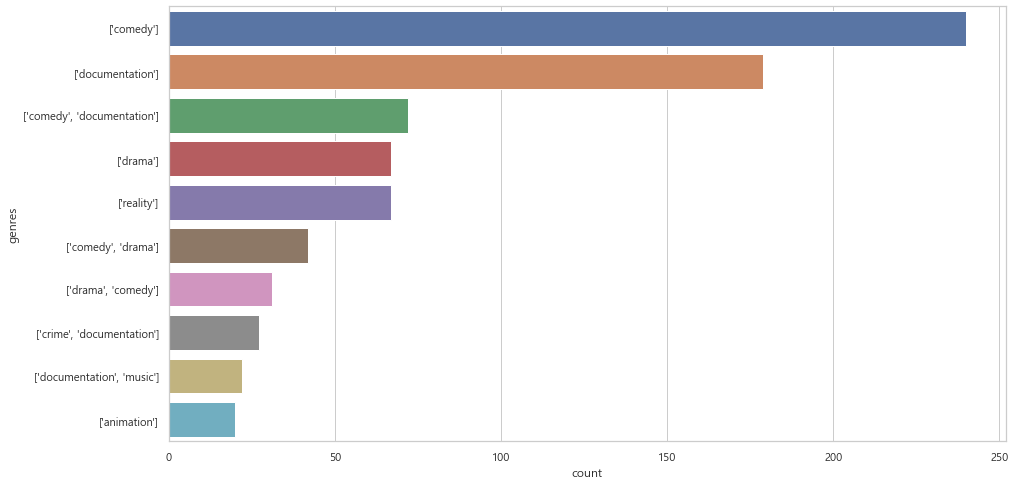

In [71]:
df2_US
df_genres_count_US = df2_US.groupby(by = 'genres')['genres'].count() # 장르 갯수 구하기
df_genres_count_US = df_genres_count_US.to_frame() # 데이터프레임 만들기
df_genres_count_US = df_genres_count_US.rename(columns={'genres': 'count'}).reset_index()
df_genres_count_US = df_genres_count_US.sort_values(by='count', ascending=False) # 크기순으로 정렬하기
df_genres_count_US.reset_index(drop = True, inplace = True) # 인덱스 새로 정렬
df_genres_count_10_US = df_genres_count_US.head(10) # 상위 10개만 추출하기

plt.figure(figsize=(15,8))
sns.barplot(data = df_genres_count_10_US, x = 'count', y = 'genres',
             order = df_genres_count_10_US.sort_values('count', ascending = False).genres)

#### 미국과 한국에서 출시된 프로그램의 장르는 각각 다르게 나타났다.
-> 그 나라의 사람들이 선호하는 장르에 따라 다르게 나타난다고 생각한다.
-> 한국은 드라마(로맨스)를 선호하는 사람이 많으며, 미국은 코미디(다큐먼트)를 선호하는 사람이 많을 것이다.
-> 그 나라의 선호도에 따라 장르를 선택하는 것이 시청률을 올리는 것에 도움이 될 것이다.

In [21]:
df[df['id'] == 'tm84618']

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [22]:
df2[df2['id'] == 'tm84618']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],0.0,tt0075314,8.3,795222.0,27.612,8.2


#### 전체/한국의 runtime 알아보기
- 한국 : 60~80의 시간대가 많이 존재한다.
- 미국 : 100~의 긴 시간대가 많이 존재한다.
- 전체로 봤을 경우 : 100 ~ 의 시간대가 많이 존재한다. -> 넥플릭스 서비스가 미국서비스 이므로 미국 프로그램이 많이 있기때문에 100~이 많은 것이라고 볼 수 있다.

In [91]:
# runtime
# 2~20 / 20~40 / 40~60 / 60~80 / 80~100 / 100~
print(df_KR_m['runtime'].min()) # 최솟값 (2시간)
print(df_KR_m['runtime'].max()) # 최댓값 (140시간)

def group(x):
    if (x >= 2) & (x < 20): 
        return '2~20'
    elif (x >= 20) & (x < 40): 
        return '20~40'
    elif (x >= 40) & (x < 60): 
        return '40~60'
    elif (x >= 60) & (x < 80): 
        return '60~80'
    elif (x >= 80) & (x < 100): 
        return '80~100'
    else:
        return '100~'

df_KR_m['runtime2'] = df_KR_m['runtime'].apply(group)
df2['runtime2'] = df2['runtime'].apply(group)
df_US_m['runtime2'] = df_US_m['runtime'].apply(group)
df_KR_m

2
140


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime2,person_id,name,character,role
0,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95701.0,Koo Hye-sun,Geum Jan-di,ACTOR
1,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95703.0,Lee Min-ho,Gu Jun-pyo,ACTOR
2,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95702.0,Kim Hyun-joong,Yoon Ji-hoo,ACTOR
3,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,36790.0,Kim Bum,So Yi-jeong,ACTOR
4,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95704.0,Kim Joon,Song Woo-bin,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,tm831387,What Happened to Mr Cha?,MOVIE,"With the peak of his career long behind him, a...",2021,0,102,"['comedy', 'drama']",['KR'],0.0,tt13667212,4.3,349.0,15.794,6.9,100~,2269469.0,Song Duk-ho,Staff,ACTOR
2730,tm831387,What Happened to Mr Cha?,MOVIE,"With the peak of his career long behind him, a...",2021,0,102,"['comedy', 'drama']",['KR'],0.0,tt13667212,4.3,349.0,15.794,6.9,100~,1201552.0,Kim Dong-gyu,0,DIRECTOR
2731,ts307816,Korean Cold Noodle Rhapsody,SHOW,"Refreshing and flavorful, naengmyeon is Korea’...",2021,TV-PG,49,['documentation'],['KR'],1.0,tt15772846,7.3,15.0,1.834,4.0,40~60,310549.0,Baek Jong-won,0,ACTOR
2732,tm1063339,Lee Su-geun: The Sense Coach,MOVIE,Lee Su-geun's rise to Korean comedy stardom we...,2021,0,45,['comedy'],['KR'],0.0,tt14880280,4.1,38.0,1.085,3.5,40~60,273872.0,Lee Su-geun,Self,ACTOR


<AxesSubplot:xlabel='runtime2', ylabel='Count'>

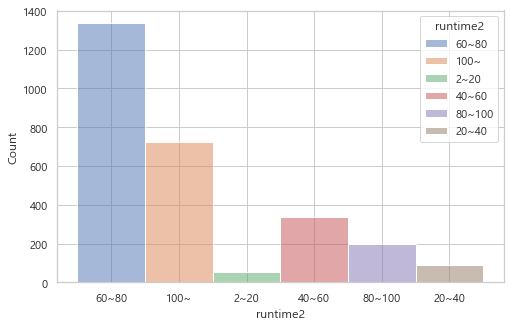

In [86]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df_KR_m, x="runtime2", hue="runtime2")
# 시간으로 봤을 경우
# 60~80시간이 가장 많다. -> 적절한 시간대는 60~80이라고 볼 수 있다.
# 보통 횟수가 많은 것은 드라마이기 때문에 60~80시간이 많다는 것은 드라마가 많다는 것이라고 볼 수 있다.

# 분으로 봤을 경우
# 60~80분이 가장 많다.
# 2분 = 티저영상같은 경우로 볼 수 있다.

<AxesSubplot:xlabel='runtime2', ylabel='Count'>

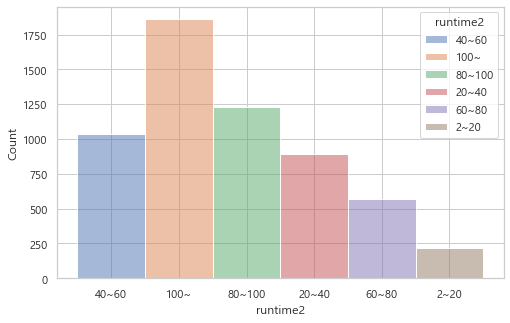

In [88]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df2, x="runtime2", hue="runtime2")
# 전체적으로 봤을 경우는 100~이 가장 많이 존재한다.

<AxesSubplot:xlabel='runtime2', ylabel='Count'>

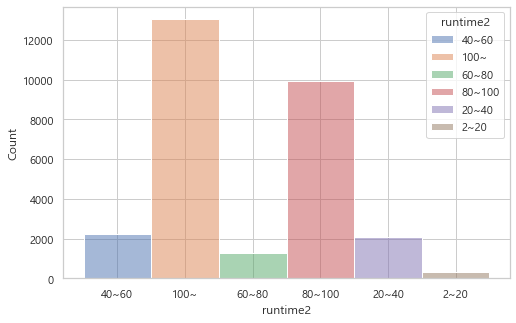

In [92]:
plt.figure(figsize = (8, 5))
sns.histplot(data = df_US_m, x="runtime2", hue="runtime2")
# 100~의 시간대가 가장 많이 존재한다.
# 짧은 시간대보다는 긴 시간대가 많이 있다고 생각할 수 있다.

In [94]:
df_KR_m.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,runtime2,person_id,name,character,role
0,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95701.0,Koo Hye-sun,Geum Jan-di,ACTOR
1,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95703.0,Lee Min-ho,Gu Jun-pyo,ACTOR
2,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11579.0,75.209,8.3,60~80,95702.0,Kim Hyun-joong,Yoon Ji-hoo,ACTOR


<AxesSubplot:xlabel='release_year', ylabel='count'>

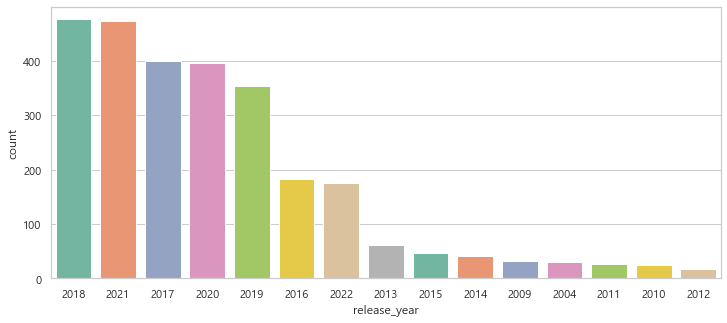

In [103]:
plt.figure(figsize=(12,5))
sns.countplot(x="release_year", data=df_KR_m, palette="Set2", order=df_KR_m['release_year'].value_counts().index[0:15])
# 상위 몇 까지 보고싶을 경우 인덱스 이용하기 (.value_counts().index[0:5])

<AxesSubplot:xlabel='release_year', ylabel='count'>

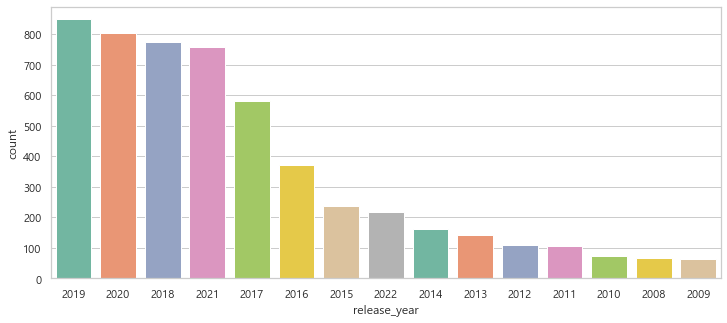

In [105]:
plt.figure(figsize=(12,5))
sns.countplot(x="release_year", data=df2, palette="Set2", order=df2['release_year'].value_counts().index[0:15])

In [108]:
df2['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', 0, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

#### age_certification는 시청할 수 있는 나이 등급이다.
- TV-MA = 성인(18세 이상, TV)
- R = 성인 (18세 이상, 영화)
- TV-14 = 청소년(16세 이상, TV)
- PG-13 = 10대(13세 이상, 영화)
- PG = 초등학생(7세 이상, 영화)
- TV-PG = 초등학생(7세 이상, TV)
- G = 키즈(전체, 영화)
- TV-Y7 = 초등학생(7세 이상, TV)
- TV-Y = 키즈(전체, TV)
- TV-G = 키즈(전체, TV)
- NC-17 = 성인(18세 이상, 영화)

<AxesSubplot:xlabel='age_certification', ylabel='count'>

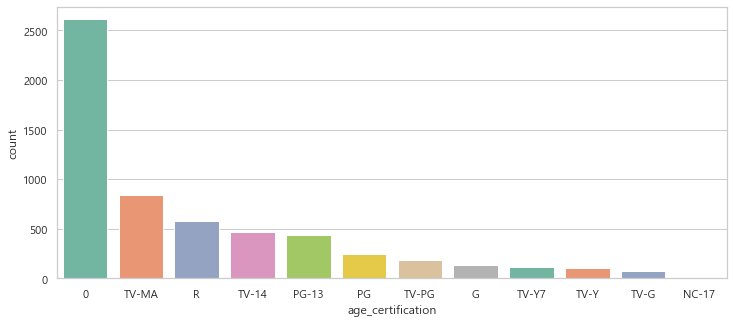

In [109]:
plt.figure(figsize=(12,5))
sns.countplot(x="age_certification", data=df2, palette="Set2", order=df2['age_certification'].value_counts().index[0:15])

<AxesSubplot:xlabel='age_certification', ylabel='count'>

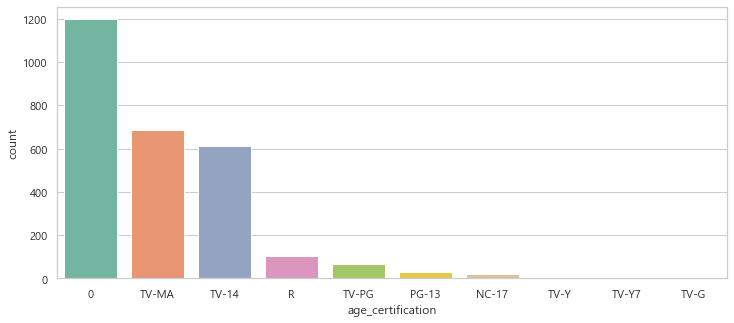

In [110]:
plt.figure(figsize=(12,5))
sns.countplot(x="age_certification", data=df_KR_m, palette="Set2", order=df_KR_m['age_certification'].value_counts().index[0:15])

<AxesSubplot:xlabel='production_countries', ylabel='count'>

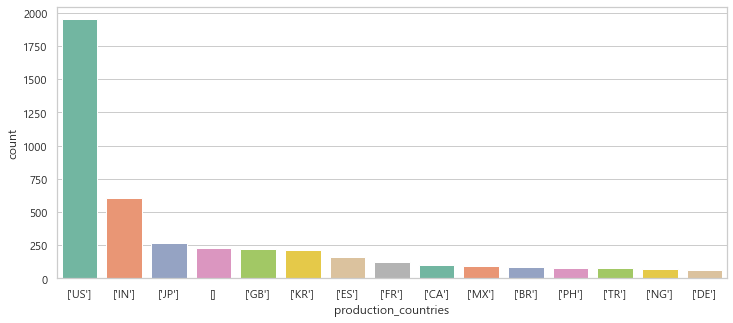

In [114]:
plt.figure(figsize=(12,5))
sns.countplot(x="production_countries", data=df2, palette="Set2", order=df2['production_countries'].value_counts().index[0:15])
# 미국 프로그램이 가장 많으며, 한국은 6위인것을 알 수 있다.